Example from figure 2 of:

Peters, F., Menzies, T., & Marcus, A. (2013). Better cross company defect prediction. In IEEE International Working Conference on Mining Software Repositories (pp. 409–418). https://doi.org/10.1109/MSR.2013.6624057

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.ensemble import RandomForestClassifier
import random
RAND_SEED = 2016 
random.seed(RAND_SEED) # change this to see new random data!

In [2]:
train_instances = [(0,6,0), (3,4,1), (4,3,0), (5,7,0), (5,2,0), (8,8,2)]
test_instances =  [(1,1), (2,6), (5,3)]

In [7]:
train_df= pd.DataFrame(train_instances, columns=['x','y','project'])
test_df = pd.DataFrame(test_instances, columns=['x','y'])

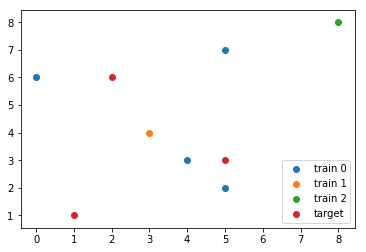

In [11]:
for project in train_df.project.unique():
    subset = train_df[train_df.project == project]
    plt.scatter(subset.x, subset.y, label="train " + str(project))
plt.scatter(test_df.x, test_df.y, label="target")
plt.legend()

In [12]:
from tl_algs import peters, burak

In [13]:
p = peters.Peters(test_set_X=test_df,
              test_set_domain="doesn'tmatter", 
              train_pool_X=train_df[['x','y']], 
              train_pool_y=pd.Series([False for __ in train_df.iterrows()]),
              train_pool_domain=train_df.project, 
              cluster_factor=9999,
              Base_Classifier=RandomForestClassifier,
              rand_seed=RAND_SEED
             )

In [15]:
p.filter_instances(p.train_pool_X, p.train_pool_y, p.test_set_X)

(     x    y
 1  3.0  4.0
 2  4.0  3.0, 0    False
 1    False
 dtype: bool)

In [16]:
b = burak.Burak(test_set_X=test_df,
              test_set_domain="doesn'tmatter", 
              train_pool_X=train_df[['x','y']], 
              train_pool_y=pd.Series([False for __ in train_df.iterrows()]),
              train_pool_domain=train_df.project, 
              cluster_factor=9999,
              Base_Classifier=RandomForestClassifier,
              rand_seed=RAND_SEED
             )

In [17]:
b.filter_instances(p.train_pool_X, p.train_pool_y, p.test_set_X, 3)[0]

,x,y
1,3.0,4.0
2,4.0,3.0
4,5.0,2.0
0,0.0,6.0
3,5.0,7.0
